In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [3]:
train_dataset = train.flow_from_directory("training",
                                          target_size = (200,200),
                                          batch_size = 100,
                                          class_mode = 'binary'
)
validation_dataset =train.flow_from_directory("validation",
                                          target_size = (200,200),
                                          batch_size = 20,
                                          class_mode = 'binary')

Found 322 images belonging to 2 classes.
Found 53 images belonging to 2 classes.


In [4]:
resnet150=tf.keras.applications.ResNet152(
    include_top=False,
    weights='imagenet',
    input_shape=(200,200,3),
    classes=2,
    pooling='max'
)
for layer in resnet150.layers:
        layer.trainable=False

In [5]:
model=Sequential()
model.add(resnet150)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,'relu'))
model.add(tf.keras.layers.Dense(1,'sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58,633,345
Trainable params: 262,401
Non-trainable params: 58,370,944
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy'])

In [8]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch =3,
                     epochs = 30,
                     validation_data=validation_dataset,
                     verbose=1)

Epoch 1/30
3/3 [==============================] - 83s 23s/step - loss: 8.8019 - accuracy: 0.4833 - val_loss: 1.8697 - val_accuracy: 0.5094
Epoch 2/30
3/3 [==============================] - 49s 15s/step - loss: 4.8394 - accuracy: 0.4730 - val_loss: 10.9619 - val_accuracy: 0.4906
Epoch 3/30
3/3 [==============================] - 61s 21s/step - loss: 7.6770 - accuracy: 0.5800 - val_loss: 3.3332 - val_accuracy: 0.4906
Epoch 4/30
3/3 [==============================] - 60s 20s/step - loss: 2.7431 - accuracy: 0.4700 - val_loss: 3.6219 - val_accuracy: 0.5094
Epoch 5/30
3/3 [==============================] - 60s 20s/step - loss: 2.6032 - accuracy: 0.4633 - val_loss: 2.3491 - val_accuracy: 0.4906
Epoch 6/30
3/3 [==============================] - 48s 14s/step - loss: 2.2616 - accuracy: 0.5991 - val_loss: 2.0122 - val_accuracy: 0.4906
Epoch 7/30
3/3 [==============================] - 48s 14s/step - loss: 1.1788 - accuracy: 0.5856 - val_loss: 1.4831 - val_accuracy: 0.5094
Epoch 8/30
3/3 [==========

In [9]:
loss, accuracy = model.evaluate(train_dataset, verbose=1)
loss_v, accuracy_v = model.evaluate(validation_dataset, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

3/3 [==============================] - 11s 3s/step - loss: 0.4504 - accuracy: 0.7547
Validation: accuracy = 0.754717  ;  loss_v = 0.450443
Test: accuracy = 0.773292  ;  loss = 0.400587


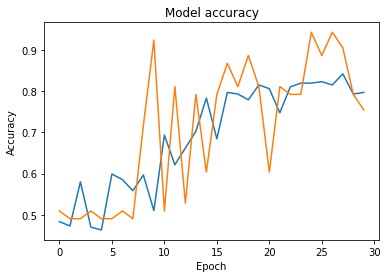

In [10]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

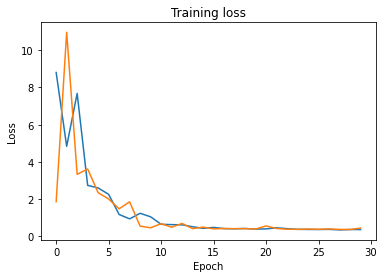

In [11]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

INFO:tensorflow:Assets written to: resnet-150\assets


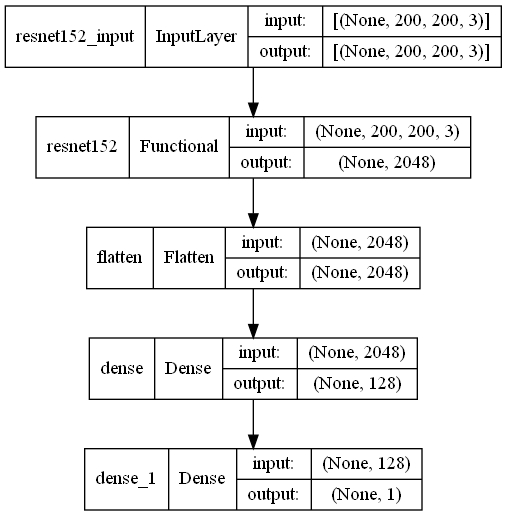

In [12]:
tf.saved_model.save(model,'resnet-150')
img_file = './model_arch3.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)